In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import utility.pickle_utils as pickle_utils

In [ ]:
# this uses the cross attention weights generated by analysis/2_compute_crossattn_weights.py example 2 and 3

In [4]:
from sklearn.decomposition import TruncatedSVD

n_components = 20
svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
crossattn_w_epbd_list = pickle_utils.load(home_dir+f"analysis/weights/10k_test_seq_crossattn_weights_epbd_list.pkl")
crossattn_w_randepbd_list = pickle_utils.load(home_dir+f"analysis/weights/10k_test_seq_crossattn_weights_randepbd_list.pkl")
print(len(crossattn_w_epbd_list), len(crossattn_w_randepbd_list), "these 2 should be equal")

crossattn_epbd_singular_values, crossattn_randepbd_singular_values = [], []
for i in range(len(crossattn_w_epbd_list)):
    crossattn_epbd = crossattn_w_epbd_list[i]
    svd.fit(crossattn_epbd)
    crossattn_epbd_singular_values.append(svd.singular_values_)
    
    crossattn_randepbd = crossattn_w_randepbd_list[i]
    svd.fit(crossattn_randepbd)
    crossattn_randepbd_singular_values.append(svd.singular_values_)
    
len(crossattn_epbd_singular_values), len(crossattn_randepbd_singular_values)

10001 10001 these 2 should be equal


(10001, 10001)

10001 10001
(10001, 20) (10001, 20)
(20,) (20,)


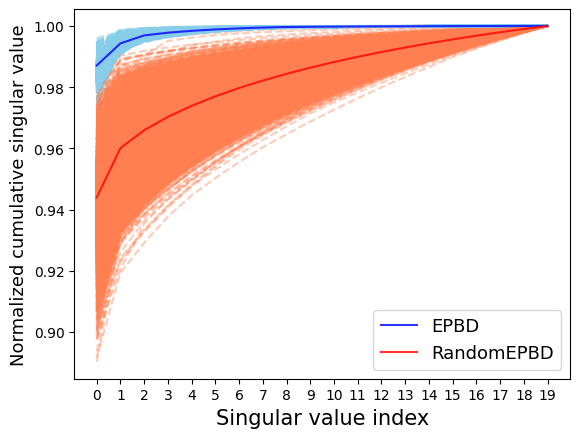

In [6]:
n_components = 20
print(len(crossattn_epbd_singular_values), len(crossattn_randepbd_singular_values))

crossattn_epbd_singular_values, crossattn_randepbd_singular_values =  np.stack(crossattn_epbd_singular_values), np.stack(crossattn_randepbd_singular_values)
print(crossattn_epbd_singular_values.shape, crossattn_randepbd_singular_values.shape)
cross_attn_singular_values_avg = np.mean(crossattn_epbd_singular_values[:,:n_components], axis=0)
cross_attn_singular_values_rand_avg = np.mean(crossattn_randepbd_singular_values[:,:n_components], axis=0)
print(cross_attn_singular_values_avg.shape, cross_attn_singular_values_rand_avg.shape)
for i in range(10001):
    plt.plot(range(n_components), np.cumsum(crossattn_epbd_singular_values[i][:n_components] / crossattn_epbd_singular_values[i][:n_components].sum()), color="skyblue", alpha=0.6, linestyle='--')
    plt.plot(range(n_components), np.cumsum(crossattn_randepbd_singular_values[i][:n_components] / crossattn_randepbd_singular_values[i][:n_components].sum()), color="coral", alpha=0.4,  linestyle='--')

plt.plot(range(n_components), np.cumsum(cross_attn_singular_values_avg / cross_attn_singular_values_avg.sum()), color="blue", alpha=0.8,  linestyle='-', label="EPBD", linewidth=1.5)
plt.plot(range(n_components), np.cumsum(cross_attn_singular_values_rand_avg / cross_attn_singular_values_rand_avg.sum()), color="red", alpha=0.8,  linestyle='-', label="RandomEPBD", linewidth=1.5)
plt.legend(fontsize=13)
plt.xticks(range(n_components))

plt.xlabel("Singular value index", fontsize=15)
plt.ylabel("Normalized cumulative singular value", fontsize=13)

plt.savefig(home_dir+f"analysis/figures/epbd_guides_dnabert2_features.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
plt.show()

In [7]:
# self_attn_weights = pickle_utils.load(home_dir+"analysis/temp/0_self_attn_weights.pkl")
# # self_attn_weights = pickle_utils.load(home_dir+"analysis/temp/0_self_attn_weights_rand.pkl")
# print(self_attn_weights.shape)

# plt.imshow(self_attn_weights[0, :, :], aspect="auto") # cmap="jet",
# plt.colorbar()

# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# svd.fit(self_attn_weights[0, :, :])
# print(svd.explained_variance_ratio_)
# print(svd.explained_variance_ratio_.sum())
# print(svd.singular_values_)

In [8]:
# cross_attn_weights = pickle_utils.load(home_dir+"analysis/temp/0_cross_attn_weights.pkl")
# # cross_attn_weights = pickle_utils.load(home_dir+"analysis/temp/0_cross_attn_weights_rand.pkl")
# print(cross_attn_weights.shape)

# plt.imshow(cross_attn_weights[0, :, :], aspect="auto") #cmap="jet"
# plt.colorbar()
# plt.show()

# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
# svd.fit(cross_attn_weights[0, :, :])
# print(svd.explained_variance_ratio_)
# print(svd.explained_variance_ratio_.sum())
# print(svd.singular_values_)

# plt.plot(range(10), np.cumsum(svd.singular_values_ / svd.singular_values_.sum()))
# plt.show()